- a software system to bring out information of web

- smart search engines can be considered unsupervised learning approaches, due to the nature of clustering related information without such label in hand

- Search Engines have evolved **from a text input and output service to** an experience that cuts across voice, video, documents, and conversations


- an **infinite problem** to solve


- **related** to information retrieval, language understanding


- the **value that an effective search tool can bring to a business is enormous**; a key piece of intellectual property. Often a search bar is the main interface between customers and the business. 
    - create a competitive advantage by delivering an improved user experience.
    


search engine popular approaches:
- manual implementation with dataframe + tf-idf
- Elastic Search + BM25
- BM25 + Azure Cognitive Search

Requirements:
- Search index for storing each document, reflecting relevant information and up to date information
    - data can be reorganized by date (suggestion)
- Query understanding
    - takes sentence and preprocessed data information **directly without much context**
    - we can extract words or tokens from the query to match **article_type** (suggestion)
        - query to match tags (done)
    - we can filter the search by either blog or News (suggestion)
        - or add multiple results available (blog, News, or both)
    - BM25 + Azure Cognitive search
- Query ranking
    - by consine similarity

## 1- Library and Data Imports

In [20]:
import numpy as np
import pandas as pd
import time

# for text cleaning and preprocessing
import re
from nltk.corpus import stopwords
import string 
from sklearn.feature_extraction.text import TfidfVectorizer


In [21]:
docs_df_cleaned2 = pd.read_csv('../Data/processed/SE_data4.csv')

In [3]:
docs_df_cleaned2.head(2)

,title,url,tags,article_type,text,text_clean,title_clean,content_clean,doc_id
0,التربية: تحويل 42 مدرسة إلى نظام الفترتين واست...,https://husna.fm/%D9%85%D8%AD%D9%84%D9%8A/%D8%...,"['التربية والتعليم', 'وزارة التربية والتعليم']",News,أكدت أمين عام وزارة التربية والتعليم للشؤون ...,أكد أمين وزاره تربيه تعليم شأن مالي إداري دكتو...,تربيه تحويل 42 مدرسه إلى نظام فتره استئجار 15 ...,تربيه تحويل 42 مدرسه إلى نظام فتره استئجار 15 ...,0
1,تكريما للمعلمين زيادة منح أبناء المعلمين 550 م...,https://husna.fm/%D9%85%D8%AD%D9%84%D9%8A/%D8%...,"['مكرمة أبناء المعلمين', 'وزارة التربية والتعل...",News,احتفلت وزارة التربية والتعليم بيوم المعلم بت...,أحتفل وزاره تربيه تعليم يوم معلم تكريم نخبه مع...,تكريم معلم زياده منح أبناء معلم 550 مقعد إضافي...,تكريم معلم زياده منح أبناء معلم 550 مقعد إضافي...,1


In [4]:
def show_info_text(df_col):
    print(f"-> Number of Documents: {docs_df.shape[0]}")
    print('-' * 50, end='\n\n')

    print('-> Documents - First 150 letters')
    print()
    for i, document_i in enumerate(docs_df['text_clean'][:20]):
        print(f"Document Number {i+1}: {document_i[:150]}..")
        print()

    print('-' * 50)
    
def data_preprocessing(df_col):
    # Instantiate a TfidfVectorizer object
    vectorizer = TfidfVectorizer()
    
    # It fits the data and transform it as a vector
    X = vectorizer.fit_transform(df_col)
    # Convert the X as transposed matrix
    X = X.T.toarray()
    # Create a DataFrame and set the vocabulary as the index
    df = pd.DataFrame(X, index=vectorizer.get_feature_names())
    return df, vectorizer

In [5]:
# fit + transform time

start_time = time.time()
content_clean_enc_df, clean2_vect = data_preprocessing(docs_df_cleaned2['content_clean'])
# text_clean_enc_df = clean2_vect.transform(docs_df_cleaned2['text_clean'])
time_measure = (time.time() - start_time) * 10**3

print('time measure: ', time_measure)
# text_clean_enc_df

time measure:  1092.2553539276123


C:\Users\modaj\OneDrive\Documents\Personal\Jobs\SHAI\intern - task 3\final-venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
print(f"TF-IDF Data: {content_clean_enc_df.shape}")

TF-IDF Data: (23799, 5084)


## 4- Results

### checking cleaning

In [9]:
# display(docs_df_cleaned.head())
i=0

In [10]:
# check results
print(f'--> {i}')
display(content_clean_enc_df.index[50*i:50*(i+1)])
display(content_clean_enc_df.index[-50*(i+1):(-50*i)-1])
i += 1

print('clean time: {:.2f} seconds'.format(time_measure * 10**-3))

--> 0


Index(['00', '000', '0000', '0000015', '001', '0013', '0016', '00249915491874',
       '00380939361181', '004', '0040732947388', '0040737373273',
       '0041766636358', '00436507716412', '004366565513092', '00436766846092',
       '00436767388014', '007', '00905384419586', '0092512833310',
       '00962795497777', '0096893921146', '00971567436777', '01', '010', '012',
       '013', '014', '015', '0167017', '018', '018ر1', '0191487964410400001',
       '02', '0211', '026', '029', '02ر626', '03', '030', '034', '037', '039',
       '03ر13', '04', '040', '0404', '041', '044', '048'],
      dtype='object')

Index(['٤٥', '٤٥٠', '٤٨', '٥٠', '٥٠٠', '٥١', '٥٢', '٥٣٧', '٥٥', '٦٠', '٦٠٠',
       '٦٠١', '٦٥', '٧٠', '٧٢', '٧٥', '٧٨', '٨٠', '٨٠٠', '٨٠٠م٢', '٨٤', '٨٥',
       '٨٧', '٨٨', '٩٠', '٩٥', '٩٧', '٩٨', '٩٩', 'ٱثنا', 'ٱثنان', 'ٱثنتان',
       'پاک', 'پیوند', 'کابل', 'کر', 'کو', 'کی', 'کیا', 'کیخلاف', 'کیلئے',
       'کےذریعےجان', 'کےفروغ', 'گستاخی', 'گفتگو', 'ہر', 'ہمارے', 'ہولوکاسٹ',
       'ہےکہ'],
      dtype='object')

clean time: 1.09 seconds


### vocabulary

In [11]:
vocab_ = clean2_vect.vocabulary_
print(f"number of unique words: {len(vocab_.keys())}")
r
print('most frequent word is --> {} ({} times)'.format(most_freq_word[0], most_freq_word[1]))
score = len(vocab_.keys()) / most_freq_word[1]
print('Ratio: {:.3f}'.format(score))

number of unique words: 23799
most frequent word is --> یقول (23798 times)
Ratio: 1.000


---

## 5-

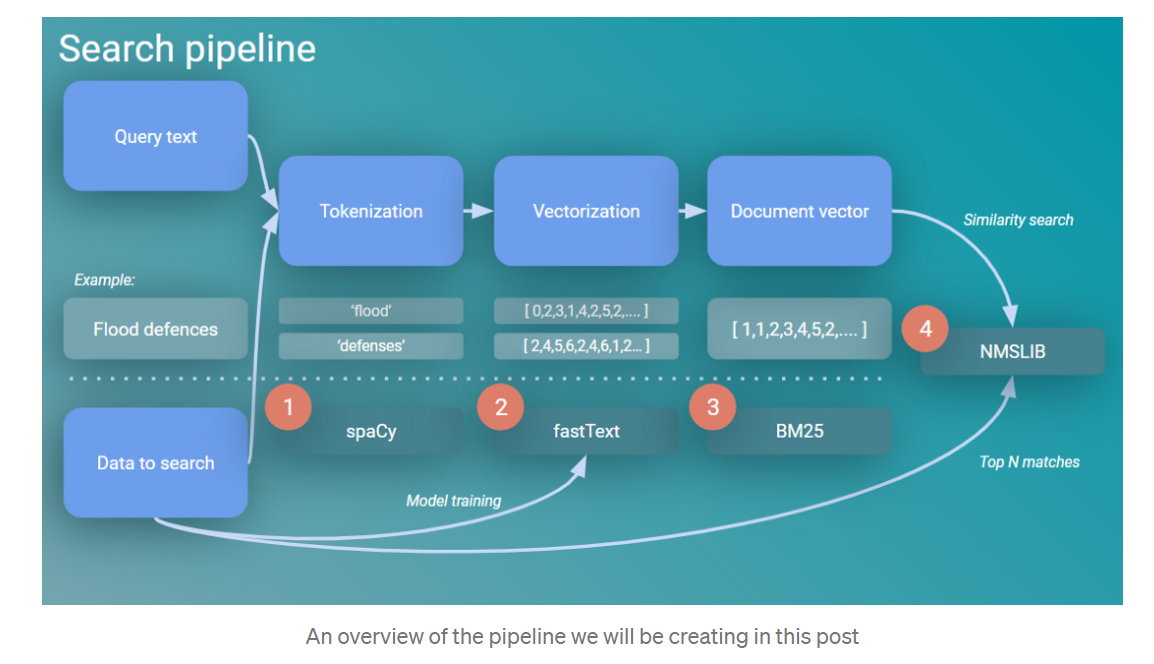

In [12]:
# remove words from vocabulary that occured once only
vocab_ = clean2_vect.vocabulary_
new_vocab = vocab_.copy()

for vocab__key in vocab_.keys():
    if vocab_[vocab__key] <=1:
        del new_vocab[vocab__key]

print('old vocab length', len(vocab_.keys()))
print('new vocab length', len(new_vocab.keys()))

old vocab length 23799
new vocab length 23797


In [22]:
import spacy
from tqdm import tqdm

In [23]:
def fix_text(x):
    """This function does nothing but leaving
    here as a placeholder for basic text cleaning"""
    return x

In [24]:
nlp = spacy.load("en_core_web_sm")
tok_text=[] # OUTPUT for our tokenised corpus
text = docs_df_cleaned2.content_clean.str.lower().values
text = [fix_text(str(i)) for i in text]

#Tokenising using SpaCy:
for doc in tqdm(nlp.pipe(text, disable=["tagger", "parser","ner"])):
    tok = [t.text for t in doc]
    tok_text.append(tok)

0it [00:00, ?it/s]C:\Users\modaj\OneDrive\Documents\Personal\Jobs\SHAI\intern - task 3\final-venv\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
5084it [00:52, 96.45it/s] 


In [25]:
print('number of documents with tokens', len(tok_text))
print('(E.g.) number of tokens for first document', len(tok_text[0]))

number of documents with tokens 5084
(E.g.) number of tokens for first document 162


In [17]:
# dict_test = {'said': 1, 'fire': 2, 'paid': 3, 'dog': 3}

# values_criteria = list(map(lambda x: x > 2, dict_test.values()))
# print(values_criteria)
# new_dict_test = dict_test.copy()

# for dict_test_key in dict_test.keys():
#     if dict_test[dict_test_key] <=1:
#         del new_dict_test[dict_test_key]
# new_dict_testd

### creating word vectors 

In [26]:
from gensim.models.fasttext import FastText

# 1
ft_model_backup = FastText(
    sg=1, # use skip-gram: usually gives better results
    vector_size=300, # embedding dimension (default)
    window=10, # window size: 10 tokens before and 10 tokens after to get wider context
    min_count=5, # only consider tokens with at least n occurrences in the corpus
    negative=15, # negative subsampling: bigger than default to sample negative examples more
    min_n=2, # min character n-gram
    max_n=5 # max character n-gram
)
ft_model_backup.build_vocab(tok_text) # tok_text is our tokenized input text - a list of lists relating to docs and tokens respectivley

ft_model_backup.train(
    tok_text,
    epochs=20,
    total_examples=ft_model_backup.corpus_count, 
    total_words=ft_model_backup.corpus_total_words)

ft_model_backup.save('_fasttext.model') #save
ft_model_backup = FastText.load('_fasttext.model') #load

#2
ft_model = gensim.models.Word2Vec.load('../Src/word_vector_models/full_grams_cbow_300_twitter.mdl')

NameError: name 'gensim' is not defined

In [ ]:
print(ft_model_backup.wv.most_similar("حلوى", topn=10, restrict_vocab=5000), end='\n\n')

print(ft_model_backup.wv['كتابه'].shape)

In [ ]:
print(ft_model.wv.most_similar("كتابه", topn=10, restrict_vocab=5000))

print(ft_model.wv['كتابه'].shape)

### Apply BM25 to word vectors

In [ ]:
from rank_bm25 import BM25Okapi

In [ ]:
bm25 = BM25Okapi(tok_text)
weighted_doc_vects = []

In [27]:
vector = ft_model.wv['ي']
vector.shape

NameError: name 'ft_model' is not defined

In [ ]:
weighted_doc_vects = []

for i,doc in tqdm(enumerate(tok_text)):
    doc_vector = []
    
    for word in doc:
        # vector = ft_model.wv[word]
        if word in ft_model.wv:
            vector = ft_model.wv[word]
        else:
            vector = ft_model_backup.wv[word]
            
        #note for newer versions of fasttext you may need to replace ft_model[word] with ft_model.wv[word]
        weight = (bm25.idf[word] * ((bm25.k1 + 1.0)*bm25.doc_freqs[i][word])) 
        / 
        (bm25.k1 * (1.0 - bm25.b + bm25.b *(bm25.doc_len[i]/bm25.avgdl))+bm25.doc_freqs[i][word])
        weighted_vector = vector * weight
        doc_vector.append(weighted_vector)
    doc_vector_mean = np.mean(doc_vector,axis=0)
    weighted_doc_vects.append(doc_vector_mean)
    
print('stored weighted(BM25) word vector representations of documents', np.array(weighted_doc_vects).shape)

In [ ]:
np.array(weighted_doc_vects).shape

### Create a super-fast search index with NMSLIB

In [ ]:
import nmslib

# create a matrix from our document vectors
data = np.vstack(weighted_doc_vects)

# initialize a new index, using a HNSW index on Cosine Similarity
index = nmslib.init(method='hnsw', space='cosinesimil')
index.addDataPointBatch(data)
index.createIndex({'post': 2}, print_progress=True)

In [ ]:
# if  " ".join(['1', '2']) in " ".join(['1','2','3']):
#     print('yes')
# else:
#     print('no')

In [ ]:
input_word = 'المولد النبوي'.lower().split()
print('input word', input_word)

query = [ft_model.wv[vec] for vec in input_word]
query = np.mean(query,axis=0)

t0 = time.time()
ids, distances = index.knnQuery(query, k=50)
print(len(ids))
ids = ids[::-1]
distances = distances[::-1]

t1 = time.time()
print(f'Searched {docs_df_cleaned2.shape[0]} records in {round(t1-t0,4) } seconds \n')
# print(distances[::-1])

actual_results = []
for i,j in zip(ids, distances):
    print(round(j, 2))
    print(docs_df_cleaned2.content_clean.values[i])
    content_i = docs_df_cleaned2.content_clean.values[i]
    print(" ".join(input_word))
    if " ".join(input_word) in content_i:
        actual_results.append((docs_df_cleaned2.content_clean.values[i], j))

## References

- https://github.com/bakrianoo/aravec
- https://towardsdatascience.com/how-to-build-a-smart-search-engine-a86fca0d0795